In [1]:
import sys
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
import thicket as th
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [2]:
tk = th.Thicket.from_caliperreader(glob("../cali_files/sample/**/*.cali"))

(2/2) Creating Thicket: 100%|██████████| 251/251 [00:01<00:00, 130.19it/s]
/home/alex/.local/lib/python3.10/site-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


In [3]:
tk.metadata.head()

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:node.order,spot:output,spot:profile.mpi,spot:region.count,spot:time.exclusive,spot:time.variance,launchdate,libraries,cmdline,cluster,algorithm,programming_model,data_type,size_of_data_type,input_size,input_type,num_procs,group_num,implementation_source,scalability
profile,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4074542,2.11.0,256,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p256-a16777216-ssample-irandom.cali,true,true,true,true,1729586333,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 16777216, sample, random]",c,sample,mpi,int,4,16777216,random,256,8,online,strong
30287862,2.11.0,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p32-a16777216-ssample-ireverse.cali,true,true,true,true,1729584860,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 16777216, sample, reverse]",c,sample,mpi,int,4,16777216,reverse,32,8,online,strong
48721836,2.11.0,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p64-a4194304-ssample-ireverse.cali,true,true,true,true,1729584729,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 4194304, sample, reverse]",c,sample,mpi,int,4,4194304,reverse,64,8,online,strong
73276465,2.11.0,512,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p512-a67108864-ssample-ireverse.cali,true,true,true,true,1729586768,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 67108864, sample, reverse]",c,sample,mpi,int,4,67108864,reverse,512,8,online,strong
83238932,2.11.0,128,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p128-a268435456-ssample-ireverse.cali,true,true,true,true,1729586045,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 268435456, sample, reverse]",c,sample,mpi,int,4,268435456,reverse,128,8,online,strong


In [4]:
print(tk.tree(metric_column="Avg time/rank"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.1.0

2.480 main
├─ 0.473 MPI_Comm_dup
├─ 0.048 MPI_Comm_split
├─ 0.000 MPI_Finalize
├─ 0.000 MPI_Finalized
├─ 0.000 MPI_Init
├─ 0.000 MPI_Initialized
├─ 0.082 comm
│  ├─ 0.044 comm_large
│  │  ├─ 0.005 MPI_Alltoall
│  │  ├─ 0.005 MPI_Alltoallv
│  │  ├─ 0.001 MPI_Gather
│  │  ├─ 0.029 MPI_Gatherv
│  │  └─ 0.005 MPI_Scatter
│  └─ 0.038 comm_small
│     └─ 0.038 MPI_Bcast
├─ 0.060 comp
│  ├─ 0.059 comp_large
│  └─ 0.001 comp_small
├─ 0.002 correctness_check
└─ 0.073 data_init_runtime
   └─ 0.070 MPI_Gather

Legend (Metric: Avg time/rank Min: 0.00 Max: 2.48 indices: {'profile': 4074542})
█ 2.23 - 2.48
█ 1.74 - 2.23
█ 1.24 - 1.74
█ 0.74 - 1.24
█ 0.25 - 0.74
█ 0.00 - 0.25

name User code    ◀  Only in left graph    ▶  Only in right graph



In [5]:
tk.metadata_column_to_perfdata("num_procs")
tk.metadata_column_to_perfdata("input_type")
tk.metadata_column_to_perfdata("input_size")
tk.dataframe = tk.dataframe.reset_index()
tk.dataframe.head()

,node,profile,nid,spot.channel,Min time/rank,Max time/rank,Avg time/rank,Total time,Variance time/rank,Min time/rank (exc),Max time/rank (exc),Avg time/rank (exc),Total time (exc),Calls/rank (min),Calls/rank (avg),Calls/rank (max),Calls/rank (total),name,num_procs,input_type,input_size
0,"{'name': 'main', 'type': 'function'}",4074542,1.0,regionprofile,2.471747,2.487463,2.479850,634.841710,0.000015,1.694945,1.773140,1.743048,446.220217,NaN,NaN,NaN,NaN,main,256,random,16777216
1,"{'name': 'main', 'type': 'function'}",30287862,1.0,regionprofile,2.433209,2.440840,2.437341,77.994916,0.000008,1.494449,1.503860,1.499807,47.993839,NaN,NaN,NaN,NaN,main,32,reverse,16777216
2,"{'name': 'main', 'type': 'function'}",48721836,1.0,regionprofile,1.767201,1.777018,1.772100,113.414400,0.000008,1.561991,1.583421,1.570252,100.496098,NaN,NaN,NaN,NaN,main,64,reverse,4194304
3,"{'name': 'main', 'type': 'function'}",73276465,1.0,regionprofile,5.105792,5.612884,5.571358,2852.535385,0.001491,2.000105,2.477034,2.089634,1069.892811,NaN,NaN,NaN,NaN,main,512,reverse,67108864
4,"{'name': 'main', 'type': 'function'}",83238932,1.0,regionprofile,11.751528,11.771779,11.758841,1505.131601,0.000019,1.591680,1.634214,1.612970,206.460188,NaN,NaN,NaN,NaN,main,128,reverse,268435456


In [6]:
def plot_pandas(df, title, xlabel, ylabel):
    plot = df.plot(kind="line",
    marker='o',
    title=title,
    xlabel=xlabel,
    ylabel=ylabel,
    figsize=(15,7)
    )
    return plot

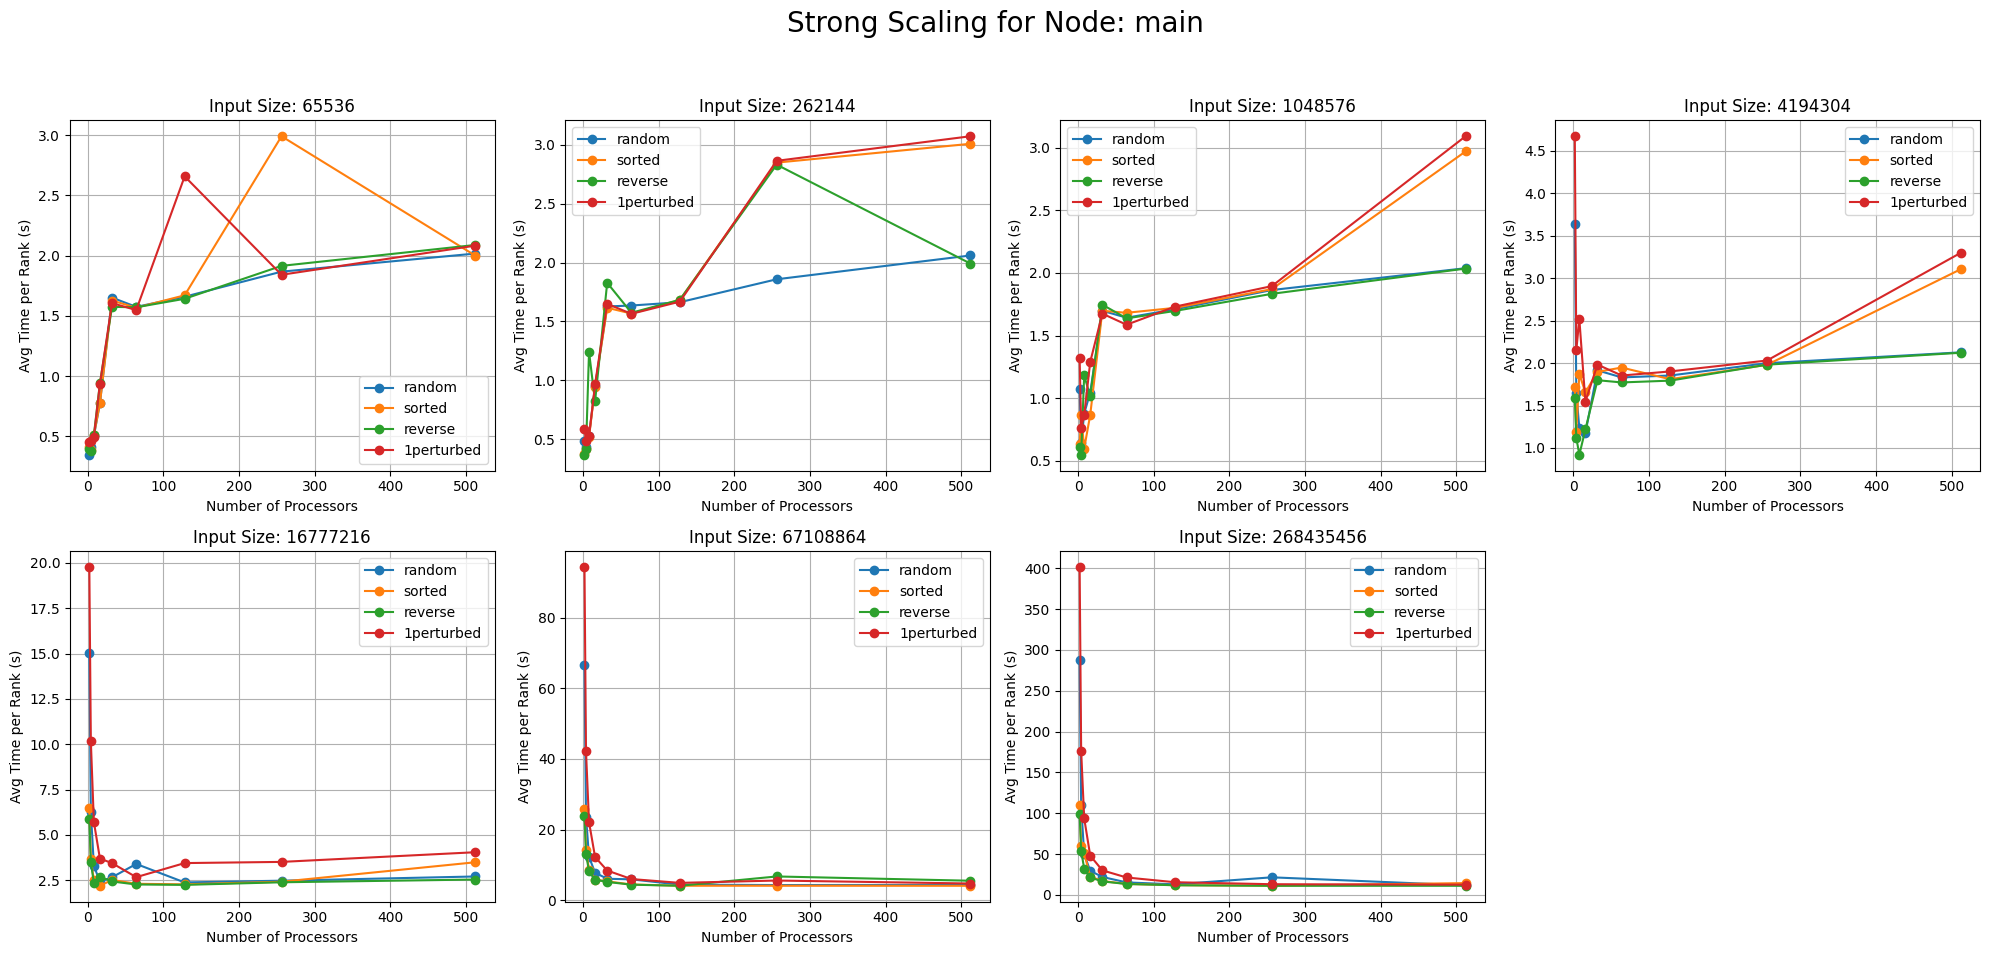

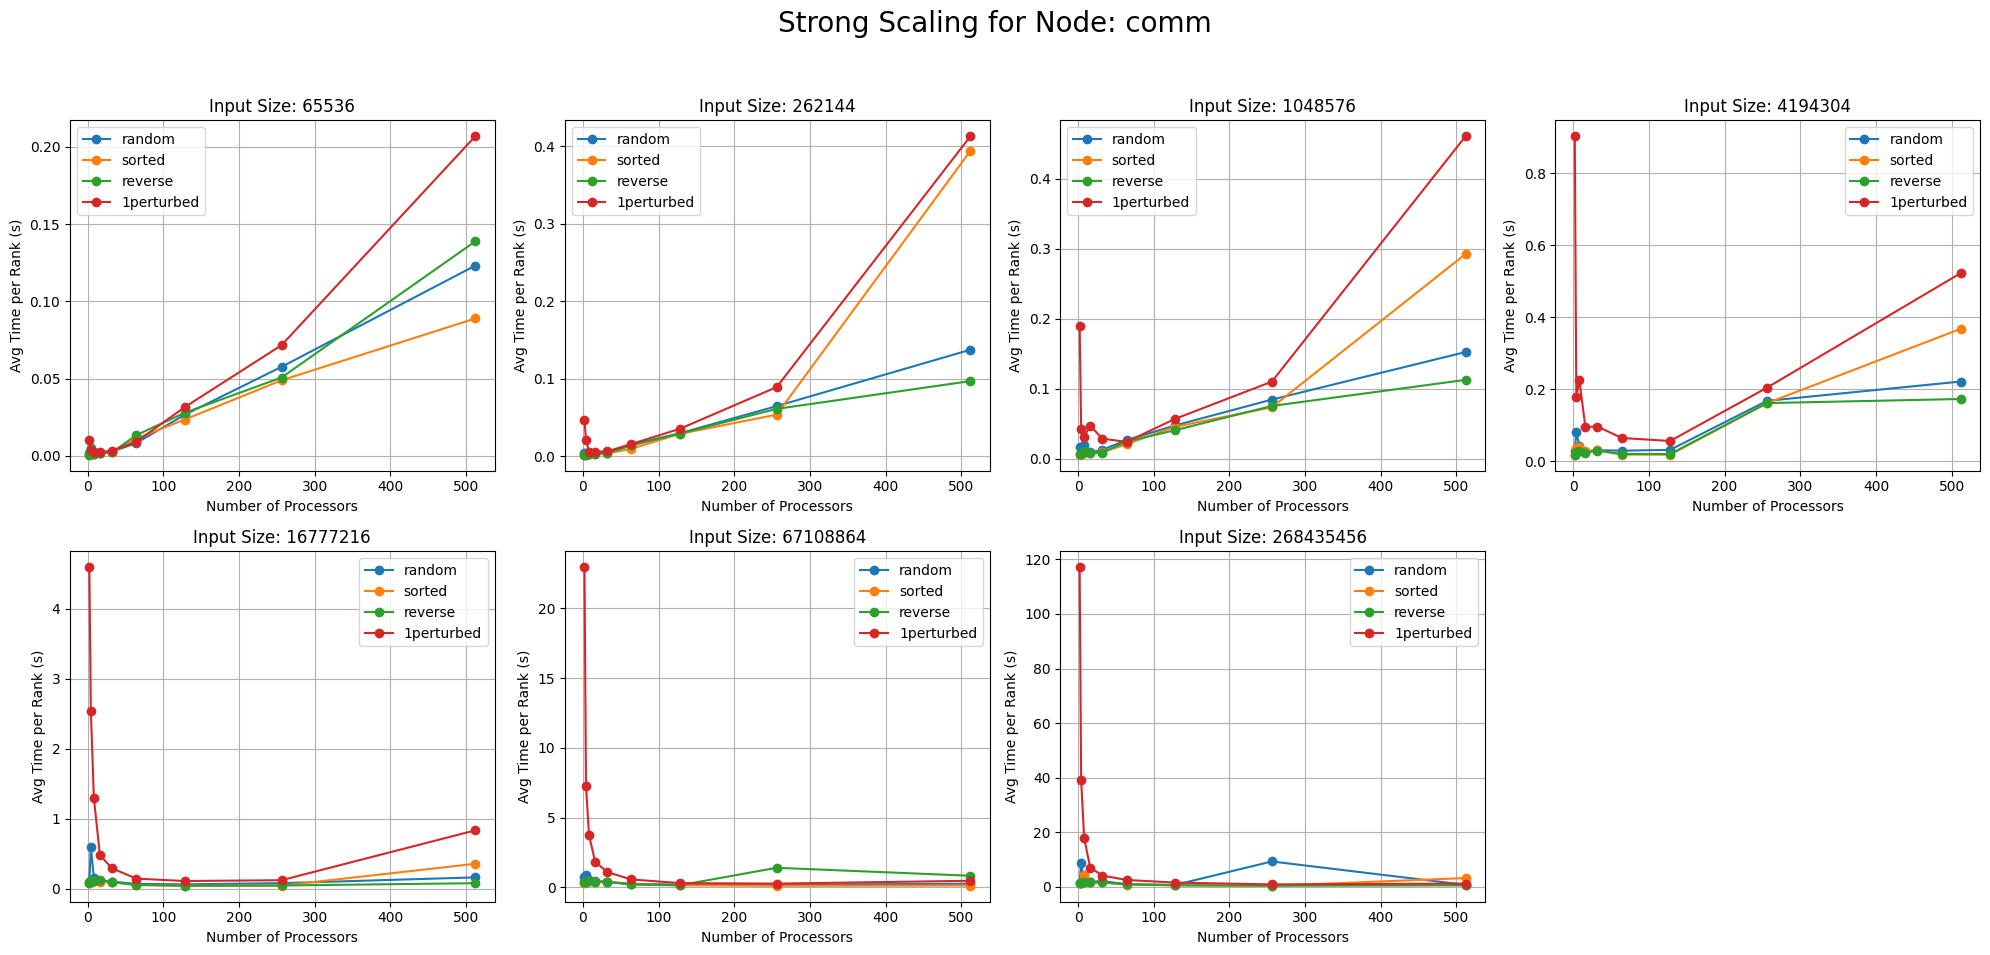

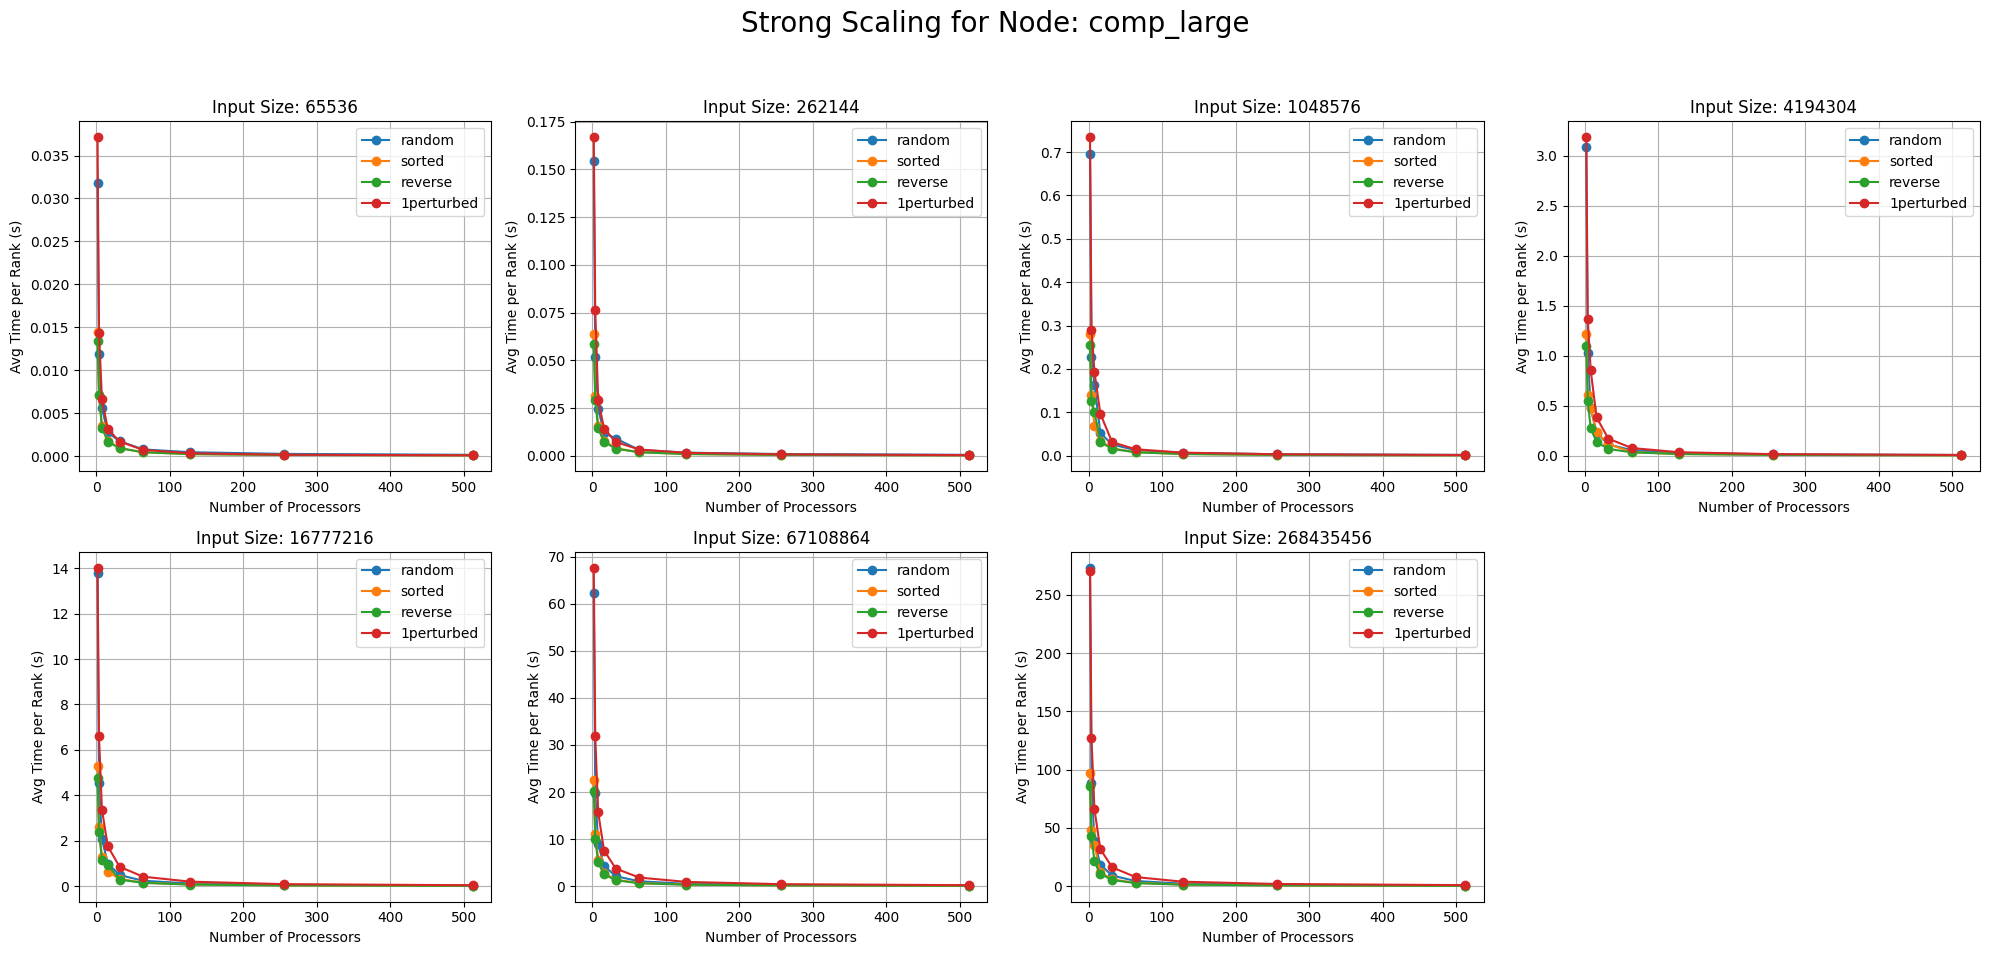

In [7]:
import os

input_sizes = [65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]
xlabels = ["Min Time per Rank (s)", "Max Time per Rank (s)", "Avg Time per Rank (s)", "Total Time per Rank (s)", "Variance Time per Rank (s)"]
time_types = ["Min time/rank", "Max time/rank", "Avg time/rank", "Total time", "Variance time/rank"]
file_output_label = ["min", "max", "avg", "total", "variance"]
type_selector = 2

# Prepare output folder for plots
output_dir = '../plot_outputs'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Function to create strong scaling plots with 4x2 subplots for each node
def plot_strong_scaling(tk, input_sizes):
    target_nodes = ['comp_large', 'comm', 'main']
    
    for node in tk.graph.traverse():
        node_name = node.frame['name']
        if node_name not in target_nodes:
            continue  # Skip nodes that are not in the target list
        
        # Create a figure with a 4x2 grid of subplots
        fig, axs = plt.subplots(2, 4, figsize=(20, 10))
        axs = axs.flatten()  # Flatten to 1D array for easy iteration
        
        for idx, input_size in enumerate(input_sizes):
            if idx >= 8:
                print(f"Warning: More input sizes than subplots available. Input size {input_size} will not be plotted.")
                break  # Prevent indexing beyond the available subplots
            
            ax = axs[idx]  # Select the appropriate subplot
            
            for input_type in ["random", "sorted", "reverse", "1perturbed"]:
                # Filter the dataframe for the current conditions
                data = tk.dataframe[
                    (tk.dataframe["input_type"] == input_type) &
                    (tk.dataframe["input_size"] == input_size) &
                    (tk.dataframe['node'] == node)
                ]
                
                if data.empty:
                    print(f"No data found for input_size={input_size}, input_type={input_type}, node={node_name}. Skipping.")
                    continue  # Skip if no data is available
                
                # Sort data by number of processors to ensure proper plotting
                data = data.sort_values(by="num_procs")
                
                # Plot the data
                ax.plot(
                    data["num_procs"],
                    data[time_types[type_selector]],
                    marker='o',
                    label=input_type
                )
            
            # Set subplot titles and labels
            ax.set_title(f'Input Size: {input_size}')
            ax.set_xlabel('Number of Processors')
            ax.set_ylabel(xlabels[type_selector])
            ax.legend()
            ax.grid(True)
        
        # Hide any unused subplots (since we have 7 input sizes and 8 subplots)
        if len(input_sizes) < len(axs):
            for j in range(len(input_sizes), len(axs)):
                fig.delaxes(axs[j])
        
        # Set the main title for the figure
        fig.suptitle(f'Strong Scaling for Node: {node_name}', fontsize=20)
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to accommodate the main title

        # Save plot to file
        filename = f'strongscaling_{file_output_label[type_selector]}_{input_type}_{node_name}_size{input_size}.png'
        filepath = os.path.join(output_dir, filename)
        plt.savefig(filepath, format='png', dpi=300)

        plt.show()
        

plot_strong_scaling(tk, input_sizes)

In [8]:
tk.dataframe = tk.dataframe.reset_index()#.set_index(["node"])
# tk.dataframe

In [9]:
tk.metadata

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:node.order,spot:output,spot:profile.mpi,spot:region.count,spot:time.exclusive,spot:time.variance,launchdate,libraries,cmdline,cluster,algorithm,programming_model,data_type,size_of_data_type,input_size,input_type,num_procs,group_num,implementation_source,scalability
profile,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4074542,2.11.0,256,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p256-a16777216-ssample-irandom.cali,true,true,true,true,1729586333,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 16777216, sample, random]",c,sample,mpi,int,4,16777216,random,256,8,online,strong
30287862,2.11.0,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p32-a16777216-ssample-ireverse.cali,true,true,true,true,1729584860,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 16777216, sample, reverse]",c,sample,mpi,int,4,16777216,reverse,32,8,online,strong
48721836,2.11.0,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p64-a4194304-ssample-ireverse.cali,true,true,true,true,1729584729,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 4194304, sample, reverse]",c,sample,mpi,int,4,4194304,reverse,64,8,online,strong
73276465,2.11.0,512,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p512-a67108864-ssample-ireverse.cali,true,true,true,true,1729586768,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 67108864, sample, reverse]",c,sample,mpi,int,4,67108864,reverse,512,8,online,strong
83238932,2.11.0,128,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p128-a268435456-ssample-ireverse.cali,true,true,true,true,1729586045,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 268435456, sample, reverse]",c,sample,mpi,int,4,268435456,reverse,128,8,online,strong
94794268,2.11.0,16,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p16-a1048576-ssample-ireverse.cali,true,true,true,true,1729584615,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 1048576, sample, reverse]",c,sample,mpi,int,4,1048576,reverse,16,8,online,strong
110512547,2.11.0,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p32-a1048576-ssample-ireverse.cali,true,true,true,true,1729584612,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 1048576, sample, reverse]",c,sample,mpi,int,4,1048576,reverse,32,8,online,strong
113737997,2.11.0,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p32-a4194304-ssample-irandom.cali,true,true,true,true,1729584790,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 4194304, sample, random]",c,sample,mpi,int,4,4194304,random,32,8,online,strong
123551920,2.11.0,128,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p128-a65536-ssample-i1perturbed.cali,true,true,true,true,1729585965,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 65536, sample, 1perturbed]",c,sample,mpi,int,4,65536,1perturbed,128,8,online,strong
